# Описание проекта

 Рассматривается интернет-магазин по продаже компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Представлены данные до 2016 года. Планируется кампания на 2017-й. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


In [1]:
# общая распаковка
import pandas as pd

data = pd.read_csv('/datasets/games.csv')

# вывод первых и последних строк таблицы data, первые данные о содержимом таблицы
display(data.head())
display(data.tail())

import warnings
warnings.filterwarnings('ignore')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [2]:
print('Общая информация о таблице')
print()
data.info()

Общая информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Информация о содержимом таблицы data. Описание данных

•	Name — название игры

•	Platform — платформа

•	Year_of_Release — год выпуска

•	Genre — жанр игры

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100)

•	User_Score — оценка пользователей (максимум 10)

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Есть небольшое количество пропусков в столбце Year_of_Release (1,6%). Единичные пропуски в других столбцах не имеют значимой роли. 

Следующие столбцы имеют большое количество пропусков:

Critic_Score       
User_Score        
Rating            

Данные столбца User_Score имеют тип object вместо логичных float64 или int64.

ШАГ 2. ПОДГОТОВКА ДАННЫХ

In [3]:
print('Значения столбца Year_of_Release - годы реализации игры и количество выпущенных игр:')
print(data['Year_of_Release'].value_counts())

Значения столбца Year_of_Release - годы реализации игры и количество выпущенных игр:
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64


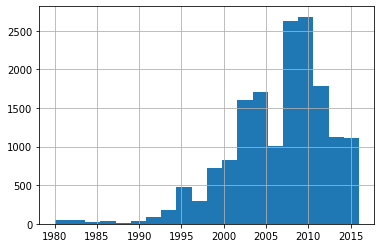

In [4]:
# график "Количество проданных игр по годам"
data['Year_of_Release'].hist(bins = 20);

Столбец Year_of_Release — год выпуска игры.

Данные (номер года) столбца имеют тип float64. Вывод всех возможных значений столбца показывает, что дробная часть значения всегда равна нулю. Без потери информации можно перевести данные в тип int64.

На этом этапе видно, что таблица содержит сильно устаревшие данные, не имеющие для этого исследования интереса. 



In [5]:
# переименование столбца в соответствии с этикетом

data = data.rename(columns={'Name': 'name'}) 
data = data.rename(columns={'Platform': 'platform'}) 
data = data.rename(columns={'Year_of_Release': 'year_of_release'}) 
data = data.rename(columns={'Genre': 'genre'}) 
data = data.rename(columns={'NA_sales': 'na_sales'}) 
data = data.rename(columns={'EU_sales': 'eu_sales'}) 
data = data.rename(columns={'JP_sales': 'jp_sales'}) 
data = data.rename(columns={'Other_sales': 'other_sales'}) 
data = data.rename(columns={'Critic_Score': 'critic_score'}) 
data = data.rename(columns={'User_Score': 'user_score'}) 
data = data.rename(columns={'Rating': 'rating'}) 
 

В описании к проекту упоминается о наличии аббревиатуры 'tbd' в столбцах с рейтингом. 

Для понимания что это такое и как обрабатывать эти значения, необходимо найти местоположение этих значений, определить частоту появления таких значений, возможные признаки и причины таких значений.

In [6]:
# поиск аббревиатуры 'tbd' в столбце с рейтингом critic_score

data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [7]:
# поиск аббревиатуры 'tbd' в столбце с рейтингом user_score

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
# поиск аббревиатуры 'tbd' в столбце с рейтингом rating

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [9]:
# выяснение частоты появления аббревиатуры 'tbd' в столбце с рейтингом user_score

print(data['user_score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
0.6       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64


In [10]:
# вывод строк с аббревиатурой 'tbd' в столбце с рейтингом user_score

display(data.loc[data['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [11]:
# попытка обнаружить зависимость рейтинга 'tbd' от продаж

print('Максимальное число проданных копий игры с рейтингом tbd в Северной Америке',
      data.loc[data['user_score'] == 'tbd','na_sales'].max())                                        
print('Максимальное число проданных копий игры с рейтингом tbd в Европе',
      data.loc[data['user_score'] == 'tbd', 'eu_sales'].max())
print('Максимальное число проданных копий игры с рейтингом tbd в Японии',
      data.loc[data['user_score'] == 'tbd', 'jp_sales'].max())

Максимальное число проданных копий игры с рейтингом tbd в Северной Америке 3.45
Максимальное число проданных копий игры с рейтингом tbd в Европе 2.59
Максимальное число проданных копий игры с рейтингом tbd в Японии 0.86


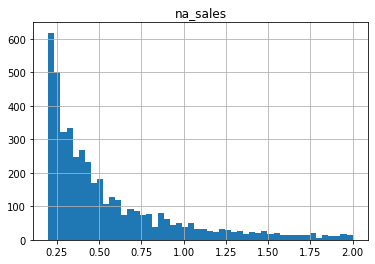

In [12]:
# общая картина продаж игр на примере С.Америки
data.hist('na_sales', bins=50, range=(0.2, 2));

Аббревиатура 'tbd' обнаружилась в столбце user_score. Строк с таким значением довольно много - 2424.


Вывод строк с аббревиатурой 'tbd' не выявляет заметных зависимостей и причин появления этого: годы выпуска, платформа, другие рейтинги и прочие параметры не объединены каким-то общим признаком с аббревиатурой 'tbd'. 

Была проведена проверка на зависимость между количеством проданных копий и таким рейтингом. Учитывая количество проданных копий игр в целом (распределение на гистограмме), делать вывод о невостребованности или наоборот свехпопулярности игр с таким рейтингом нельзя. 

Проведению анализа мешает тип данных таких ячеек, поэтому, во избежание искажения результатов исследования, аббревиатура 'tbd' будет заменена числовым значением, резко отличающимся от данных, предусмотренных документацией. Рейтинг пользователей имеет значение от 0 до 10, таким образом, значение минус 1.0 (тип данных float64) будет выделять ячейки с рейтингом 'tbd', и позволит провести дальнейший анализ таблицы.


Кроме того, столбцы critic_score, user_score, rating содержат пропуски. Некоторое количество пропусков содержит и столбец year_of_release. Для единообразия и возможности вести вычисления и анализ, все пропуски в указанных столбцах заменяю значением минус 2.0. Такое значение не смешивается с другими значениями.

В итоге, по всей таблице значения минус 1 и минус 2 хоть и будут иметь тип float64, но будут являться категориальными значениями:

минус 1 - tbd

минус 2 - нет данных

In [13]:
# замена аббревиатуры 'tbd' на минус 1
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1.0
# замена пропусков значением минус 2.0
data['user_score'] = data['user_score'].fillna(-2) 
# перевод значений столбцы в тип float64
data['user_score'] = data['user_score'].astype('float')

In [14]:
# замена пропусков значением минус 2.0
data['critic_score'] = data['critic_score'].fillna(-2) 

In [15]:
# замена пропусков значением минус 2.0
data['rating'] = data['rating'].fillna(-2) 

In [16]:
# замена пропусков значением минус 2
data['year_of_release'] = data['year_of_release'].fillna(-2) 
# перевод значений столбцы в тип int
data['year_of_release'] = data['year_of_release'].astype('int')

In [17]:
# суммарные продажи во всех регионах
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# проверка выполнения пердыдущих операций
data.info()
display(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-2.0,-2.0,-2,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-2.0,-2.0,-2,31.38


ШАГ 3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

In [18]:
# начало исследования по количеству реализованных игр по платформам
# вывод всех платформ и их характеристик
print('Названия платформ и суммарное количество проданных копий игр к этим платформам:')     
data.groupby('platform')['total_sales'].count() 

Названия платформ и суммарное количество проданных копий игр к этим платформам:


platform
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: total_sales, dtype: int64

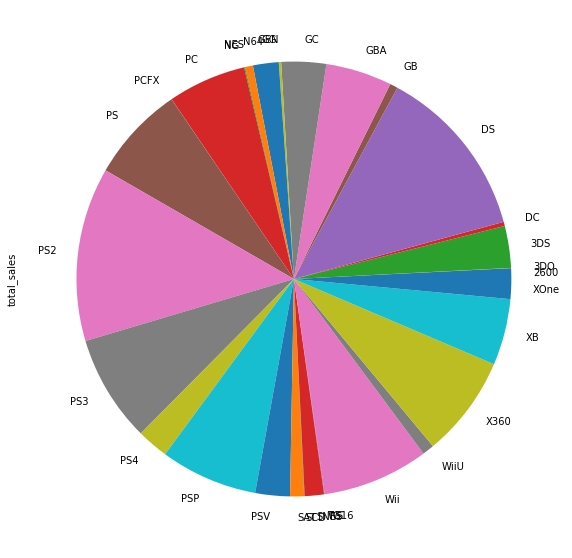

In [19]:
# график, иллюстрирующий предыдущий вывод 
# названия платформ и суммарное количество проданных копий игр к этим платформам
data.groupby('platform')['total_sales'].count().plot(y = 'column', kind = 'pie', figsize=(10, 10));

Index(['XOne', 'GC', 'SNES', 'N64', 'NES', 'GB', 'XB', '3DS', 'PC', 'PSP',
       'PS4', 'GBA', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'],
      dtype='object', name='platform')

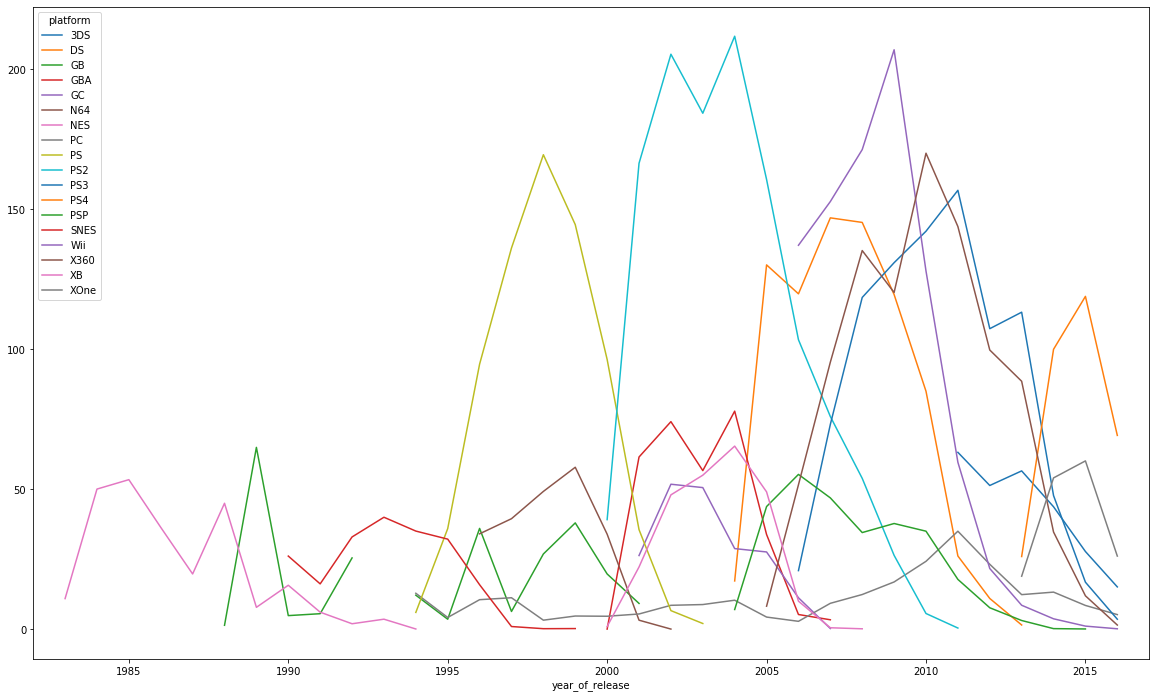

In [20]:
# группировка таблицы по платформам, подсчёт суммарного количества реализованных игр,
# вывод значений более 100 млн. копий

data_1 = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales').\
tail(18).index

display(data_1)

# вывод в виде графика среза таблицы, удовлетворяющего условию предыдущей команды
# ГРАФИК № 1

data.query('platform in @data_1').pivot_table(index = 'year_of_release', columns = 'platform',
    values = 'total_sales', aggfunc = 'sum').plot(xlim = (1982, 2017), figsize = (20, 12));

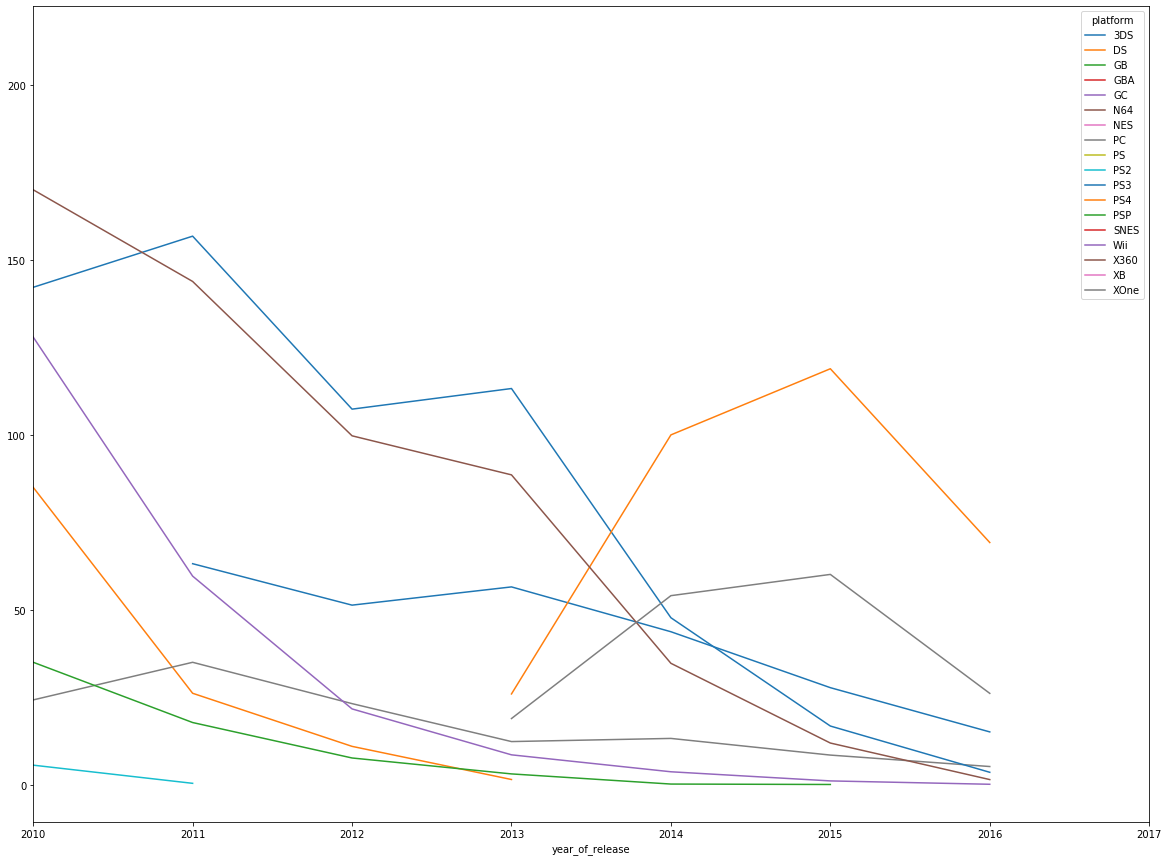

In [21]:
# вывод того же графика - среза таблицы, за последнее десятилетие
# ГРАФИК № 2

data.query('platform in @data_1').pivot_table(index = 'year_of_release', columns = 'platform',
    values = 'total_sales', aggfunc = 'sum').plot(xlim = (2010, 2017), figsize = (20, 15));

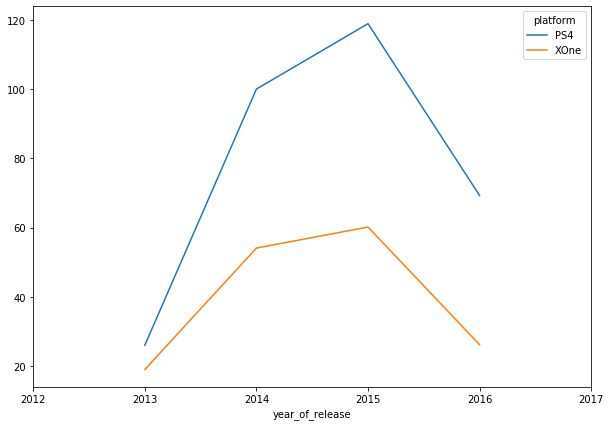

In [22]:
# вывод графика реализации игр лидеров последних лет - платформ PS4 и XOne
# ГРАФИК № 3

data.query('platform == "XOne" or platform == "PS4"').pivot_table(index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales', aggfunc = 'sum').plot(xlim = (2012, 2017), figsize = (10, 7));

Вывод списком суммарного количества реализованных игр показывает, что часть платформ реализуют очень небольшое количество игр, и, по видимому, экономически нерентабельны. 


График № 1 показывает время жизни игровых платформ. Определяющим фактором здесь является динамика реализации игр. С некоторой вариативностью типичный график выглядит ломаной линией, имеющей характерные участки (стадии развития платформы) - рост, пиковое значение, спад. Возможны плато, два пика, близкие друг к другу по времени, замедление роста, замедление падения. Типичное время жизни платформы от 4 до 6 лет. 

График № 2 показывает динамику реализации игр с 2010 по 2016 годы. Видны спады - последние годы жизни одних платформ и начало жизни (старта) других платформ. На графике чётко выделяются две игровые платформы - PS4 и XOne. Учитывая, что данные за 2016 год неполные, и предполагая, что время жизни платформы от 4 до 6 лет, можно предполагать, что именно эти две платформы являются и будут являться лидерами рынка в ближайшие годы, и наиболее вероятно в интресующем 2017 году. 

График № 3 показывает динамику лидеолв рынка последних лет: платформ PS4 и XOne. Данные за 2016 год не полные. Отображённый спад - эффект недостатка данных.

* Платформы PS4 и XOne.

Старт платформ на рынке в один год - в 2013 году. Рост платформы PS4 быстрее, чем рост плтаформы XOne. Абсолютные показатели (число реализованных копий игр) платформы PS4 также выше, чем показатели платформы XOne. Предполагаемое время упадка обеих платформ не ранее 2018 года (при среднем сроке жизни платформы 5 лет). 

(0, 1000)

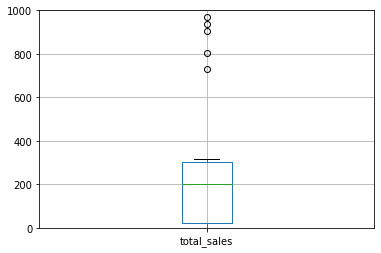

In [23]:
# диаграмма по глобальным продажам игр
import matplotlib.pyplot as plt

data.groupby('platform').sum().boxplot('total_sales')

plt.ylim(0, 1000)

In [24]:
# создание среза данных по глобальным продажам игр для игр, реализованных после 2013 года

data_2 = data.query('year_of_release > 2013').groupby('platform').agg({'total_sales': 'sum'}).\
sort_values(by = 'total_sales').tail(8).index

display(data_2)

Index(['PSV', 'PC', 'WiiU', 'X360', 'PS3', '3DS', 'XOne', 'PS4'], dtype='object', name='platform')

(0, 4.2)

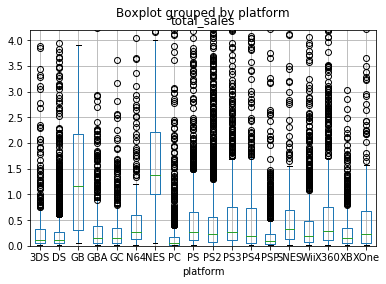

In [25]:
# диаграммы по ряду платформ по глобальным продажам игр для игр

data.query('platform in @data_1').boxplot('total_sales', by='platform')
plt.ylim(0, 4.2)


(0, 2)

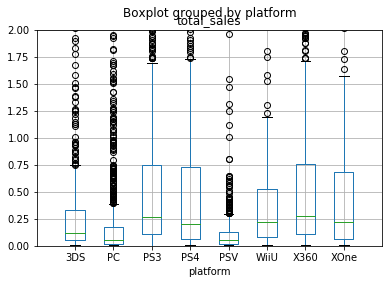

In [26]:
# диаграммы по ряду платформ по глобальным продажам игр для игр, реализованных после 2013 года

data.query('platform in @data_2').boxplot('total_sales', by='platform')

plt.xlim(0, 9)
plt.ylim(0, 2)

In [27]:
# характеристики данных total_sales по платформам
data.groupby('platform')['total_sales'].sum().describe() 

count      31.000000
mean      287.603548
std       348.160256
min         0.030000
25%        23.360000
50%       200.040000
75%       304.095000
max      1255.770000
Name: total_sales, dtype: float64

In [28]:
# характеристики данных total_sales по платформам для игр, реализованных после 2013 года
data.query('year_of_release > 2013').groupby('platform')['total_sales'].sum().describe() 

count     10.000000
mean      72.945000
std       86.355404
min        0.360000
25%       23.562500
50%       45.600000
75%       82.055000
max      288.150000
Name: total_sales, dtype: float64

Построен ряд графиков типа "ящик с усами". 


* Общий график для всех платформ за всё время наблюдений. 
График "ящик с усами" демонстрирует распределение количества реализованных игр в разбивке по платформам. Видно, что основные значения количества реализованных игр меньше среднего количества, а высокие показатели явлются очень редкими, нетипичными. Таким образом, можно сделать вывод о том, что заметный коммерческий успех в реализации игр является скорее исключением, чем правилом, т.е. является выбросом.

В дополнение к графикам "ящик с усами" метод describe() демострирует численно характеристики данных по суммарным продажам (total_sales) по платформам. 


count      31 - в исследовании 31 платформа 

mean       287.60 - среднее арифметическое значение по продажам

std        348.16 - стандартное отклонение, т.е. характеристика разброса занчений продаж

min        0.03 - минимальное значение по продажам

25%        23.36 - первый квартиль значений по продажам

50%        200.04 - медиана, или второй квартиль значений по продажам

75%        304.10 - третий квартиль значений по продажам

max        1255.77 - максимальное значение по продажам


Стандартное отклонение значения по продажам столь велико, что почти в два раза превышает медианное значение по продажам, и ещё значительно выше среднего значения.


* Графики для платформ-лидерови графики для платформ-лидеров после 2013 года демонстрируют другую картину: медианные значение и средние значения значительно ниже и ближе к первому квартилю, а разброс (среднее отклонение) в этом случае не так велик, и уже не превышает значения третьего квартиля.


В дополнение к графикам "ящик с усами" метод describe() демострирует численно характеристики данных по суммарным продажам (total_sales) по платформам для платформ-лидеров после 2013 года. 


count     10 - в исследовании 10 платформ 

mean      72.95 - среднее арифметическое значение по продажам

std       86.36 - стандартное отклонение, т.е. характеристика разброса занчений продаж

min       0.36 - минимальное значение по продажам

25%       23.56 - первый квартиль значений по продажам

50%       45.60 - медиана, или второй квартиль значений по продажам

75%       82.06 - третий квартиль значений по продажам

max       288.15 - максимальное значение по продажам


In [29]:
# создание отдельной таблицы с играми на платформе PS4 и без отстутствующих значений рейтинга
data_ps4 = data.query('platform == "PS4" and critic_score != -2 and user_score > 0')
display(data_ps4.head())
data_ps4.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 42 to 16530
Data columns (total 12 columns):
name               249 non-null object
platform           249 non-null object
year_of_release    249 non-null int64
genre              249 non-null object
na_sales           249 non-null float64
eu_sales           249 non-null float64
jp_sales           249 non-null float64
other_sales        249 non-null float64
critic_score       249 non-null float64
user_score         249 non-null float64
rating             249 non-null object
total_sales        249 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 25.3+ KB


In [30]:
# создание отдельной таблицы с играми на платформе XOne и без отстутствующих значений рейтинга
data_xone1 = data.query('platform == "XOne" and critic_score != -2 and user_score > 0')
display(data_xone1.head())
data_xone1.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 165 to 16660
Data columns (total 12 columns):
name               165 non-null object
platform           165 non-null object
year_of_release    165 non-null int64
genre              165 non-null object
na_sales           165 non-null float64
eu_sales           165 non-null float64
jp_sales           165 non-null float64
other_sales        165 non-null float64
critic_score       165 non-null float64
user_score         165 non-null float64
rating             165 non-null object
total_sales        165 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 16.8+ KB


In [31]:
# создание отдельной таблицы без отстутствующих значений рейтинга и для периода после 2013 года
data_nonorating = data.query('critic_score != -2 and user_score > 0 and year_of_release > 2013')
display(data_nonorating.head())
data_nonorating.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 42 to 16692
Data columns (total 12 columns):
name               704 non-null object
platform           704 non-null object
year_of_release    704 non-null int64
genre              704 non-null object
na_sales           704 non-null float64
eu_sales           704 non-null float64
jp_sales           704 non-null float64
other_sales        704 non-null float64
critic_score       704 non-null float64
user_score         704 non-null float64
rating             704 non-null object
total_sales        704 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 71.5+ KB


In [32]:
# оценка корреляции между отзывами критиков и продажами в мире и в разных частях мира
print('Коэффициент корреляции оценки критиков и суммарных продаж',
      data_nonorating['critic_score'].corr(data_nonorating['total_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в С.Америке',
      data_nonorating['critic_score'].corr(data_nonorating['na_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в Европе',
      data_nonorating['critic_score'].corr(data_nonorating['eu_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в Японии',
      data_nonorating['critic_score'].corr(data_nonorating['jp_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в остальном мире',
      data_nonorating['critic_score'].corr(data_nonorating['other_sales']))

Коэффициент корреляции оценки критиков и суммарных продаж 0.32536261200758865

Коэффициент корреляции оценки критиков и продаж в С.Америке 0.3304978484872334

Коэффициент корреляции оценки критиков и продаж в Европе 0.2686239706590737

Коэффициент корреляции оценки критиков и продаж в Японии 0.12822214077336605

Коэффициент корреляции оценки критиков и продаж в остальном мире 0.28738082765784934


In [33]:
# оценка корреляции между отзывами пользователей и продажами в мире и в разных частях мира
print('Коэффициент корреляции оценки пользователей и суммарных продаж',
      data_nonorating['user_score'].corr(data_nonorating['total_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в С.Америке',
      data_nonorating['user_score'].corr(data_nonorating['na_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в Европе',
      data_nonorating['user_score'].corr(data_nonorating['eu_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в Японии',
      data_nonorating['user_score'].corr(data_nonorating['jp_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в остальном мире',
      data_nonorating['user_score'].corr(data_nonorating['other_sales']))

Коэффициент корреляции оценки пользователей и суммарных продаж 0.005202258360087502

Коэффициент корреляции оценки пользователей и продаж в С.Америке -0.0007490967445875624

Коэффициент корреляции оценки пользователей и продаж в Европе -0.03499420527535191

Коэффициент корреляции оценки пользователей и продаж в Японии 0.1910073571664158

Коэффициент корреляции оценки пользователей и продаж в остальном мире -0.0134192711114096


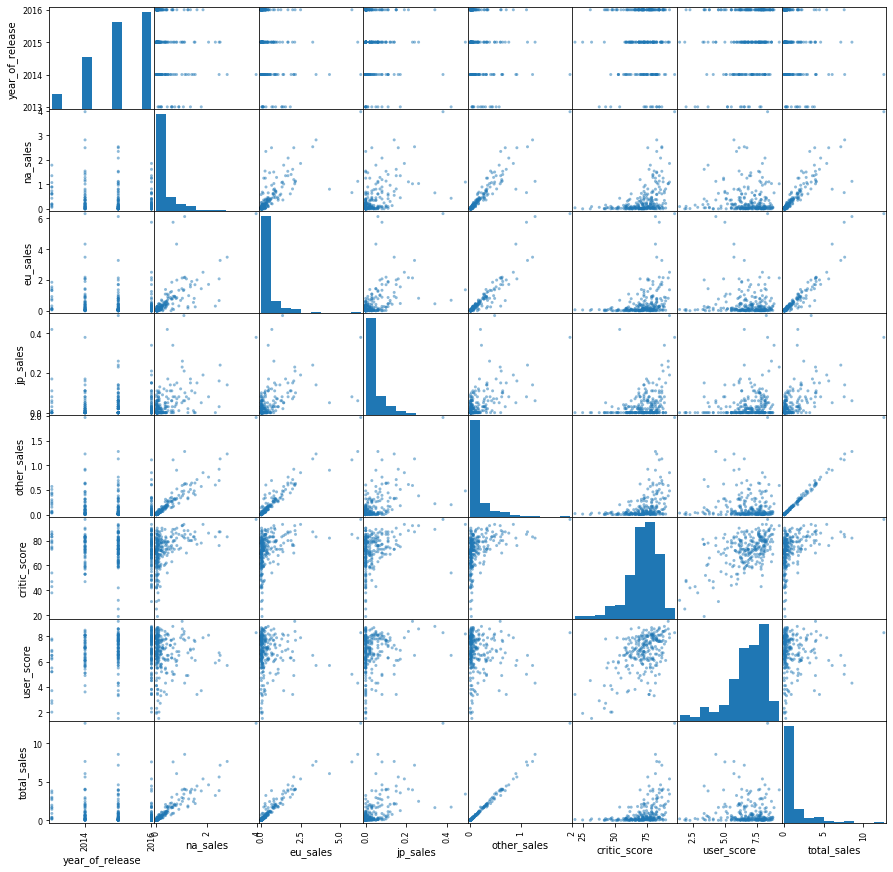

In [34]:
# построение матрицы диаграммы рассеяния для платформы PS4
pd.plotting.scatter_matrix(data_ps4, figsize=(15, 15));

In [35]:
# оценка корреляции между отзывами критиков и продажами в мире и в разных частях мира 
# для платформы PS4
print('Коэффициент корреляции оценки критиков и суммарных продаж',
      data_ps4['critic_score'].corr(data_ps4['total_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в С.Америке',
      data_ps4['critic_score'].corr(data_ps4['na_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в Европе',
      data_ps4['critic_score'].corr(data_ps4['eu_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в Японии',
      data_ps4['critic_score'].corr(data_ps4['jp_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в остальном мире',
      data_ps4['critic_score'].corr(data_ps4['other_sales']))

Коэффициент корреляции оценки критиков и суммарных продаж 0.40589480145836687

Коэффициент корреляции оценки критиков и продаж в С.Америке 0.41424135714464183

Коэффициент корреляции оценки критиков и продаж в Европе 0.3460438388431426

Коэффициент корреляции оценки критиков и продаж в Японии 0.3220567887021331

Коэффициент корреляции оценки критиков и продаж в остальном мире 0.40846485652797093


In [36]:
# оценка корреляции между отзывами пользователей и продажами в мире и в разных частях мира 
# для платформы PS4
print('Коэффициент корреляции оценки пользователей и суммарных продаж',
      data_ps4['user_score'].corr(data_ps4['total_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в С.Америке',
      data_ps4['user_score'].corr(data_ps4['na_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в Европе',
      data_ps4['user_score'].corr(data_ps4['eu_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в Японии',
      data_ps4['user_score'].corr(data_ps4['jp_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в остальном мире',
      data_ps4['user_score'].corr(data_ps4['other_sales']))

Коэффициент корреляции оценки пользователей и суммарных продаж -0.03362497596528878

Коэффициент корреляции оценки пользователей и продаж в С.Америке -0.022576553042172442

Коэффициент корреляции оценки пользователей и продаж в Европе -0.05067095937387298

Коэффициент корреляции оценки пользователей и продаж в Японии 0.17451221989207766

Коэффициент корреляции оценки пользователей и продаж в остальном мире -0.03733210236553081


In [37]:
# оценка корреляции между отзывами критиков и продажами в мире и в разных частях мира
# для платформы XOne
print('Коэффициент корреляции оценки критиков и суммарных продаж',
      data_xone1['critic_score'].corr(data_xone1['total_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в С.Америке',
      data_xone1['critic_score'].corr(data_xone1['na_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в Европе',
      data_xone1['critic_score'].corr(data_xone1['eu_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в Японии',
      data_xone1['critic_score'].corr(data_xone1['jp_sales']))
print()
print('Коэффициент корреляции оценки критиков и продаж в остальном мире',
      data_xone1['critic_score'].corr(data_xone1['other_sales']))

Коэффициент корреляции оценки критиков и суммарных продаж 0.41042203561296375

Коэффициент корреляции оценки критиков и продаж в С.Америке 0.3818590242398094

Коэффициент корреляции оценки критиков и продаж в Европе 0.3734540191976152

Коэффициент корреляции оценки критиков и продаж в Японии 0.19997759323214237

Коэффициент корреляции оценки критиков и продаж в остальном мире 0.4049956816211105


In [38]:
# оценка корреляции между отзывами пользователей и продажами в мире и в разных частях мира
# для платформы XOne
print('Коэффициент корреляции оценки пользователей и суммарных продаж',
      data_xone1['user_score'].corr(data_xone1['total_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в С.Америке',
      data_xone1['user_score'].corr(data_xone1['na_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в Европе',
      data_xone1['user_score'].corr(data_xone1['eu_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в Японии',
      data_xone1['user_score'].corr(data_xone1['jp_sales']))
print()
print('Коэффициент корреляции оценки пользователей и продаж в остальном мире',
      data_xone1['user_score'].corr(data_xone1['other_sales']))

Коэффициент корреляции оценки пользователей и суммарных продаж -0.09400318326920852

Коэффициент корреляции оценки пользователей и продаж в С.Америке -0.09404716103867439

Коэффициент корреляции оценки пользователей и продаж в Европе -0.07582162075586689

Коэффициент корреляции оценки пользователей и продаж в Японии 0.07191470875655807

Коэффициент корреляции оценки пользователей и продаж в остальном мире -0.09596305443612489


* Выводы о зависимостях объёмов продаж игр от отзывов

Полученные коэффициенты корреляции между оценками критиков и пользователей на продажи игр в целом, для платформы PS4 и для платформы XOne в мире или в отдельных частях мира имеют невысокие величины. 

Коэффициенты корреляции между оценками критиков и продажами для ведущих на 2016 год платформ - PS4 и XOne заметно выше аналогичных коэффициентов для всех платформ в целом.

Коэффициенты корреляции между оценками критиков и продажами в целом заметно выше коэффициентов корреляции между оценками пользователей и продажами.

В сумме, оценки критиков влияют на продажи значительно сильнее, чем оценки пользователей. Однако, это влияение остаётся несильным.
  
Коэффициенты корреляции между оценками и продажами имеют свои региональные особенности. Коэффициенты корреляции этих зависимостей имеют заметно отличающиеся значения для Японии.

Можно утверждать, что:
* зависимости между рейтингом от пользователей и объёмами продаж игр нет;
* зависимость между рейтингом от критиков и объёмами продаж игр потенциально возможна, в настоящее время для анализируемых платформ зависимость очень слаба.

In [39]:
# список жанров по частоте для периода после 2013 года
print('Список жанров игр в порядке убывания их числа (популярности)')
data_nonorating['genre'].value_counts()

Список жанров игр в порядке убывания их числа (популярности)


Action          227
Role-Playing     97
Shooter          87
Sports           83
Racing           45
Adventure        34
Misc             32
Fighting         31
Platform         26
Simulation       20
Strategy         18
Puzzle            4
Name: genre, dtype: int64

In [40]:
# список жанров в алфавитном порядке с показателями продаж для периода после 2013 года
print('Список жанров игр в алфавитном порядке с указанием суммарных продаж игр этого жанра')
data_nonorating.groupby('genre')['total_sales'].sum()

Список жанров игр в алфавитном порядке с указанием суммарных продаж игр этого жанра


genre
Action          126.39
Adventure         5.74
Fighting         12.37
Misc             12.04
Platform         15.00
Puzzle            1.28
Racing           22.00
Role-Playing     49.14
Shooter         111.09
Simulation        9.73
Sports           78.27
Strategy          2.67
Name: total_sales, dtype: float64

In [41]:
# список жанров в алфавитном порядке с показателями продаж для периода после 2013 года
print('Список жанров игр в алфавитном порядке с указанием медианных продаж игр этого жанра')
data_nonorating.groupby('genre')['total_sales'].median()

Список жанров игр в алфавитном порядке с указанием медианных продаж игр этого жанра


genre
Action          0.160
Adventure       0.065
Fighting        0.150
Misc            0.320
Platform        0.155
Puzzle          0.040
Racing          0.130
Role-Playing    0.160
Shooter         0.620
Simulation      0.150
Sports          0.430
Strategy        0.105
Name: total_sales, dtype: float64

С большим отрывом по частоте и по суммарным продажам самым популярным жанром игр является Action. Однако, показатели медианных продаж показывают явное лидерство игр жанра Shooter. Далее, по медианным продажам следуют игры жанров: Sports, Misc и только за ними Action и Role-Playing с одинаковыми показателями.


На последних местах по популярности жанры Strategy и Puzzle, по объёмам продаж жанры Strategy, Adventure, Puzzle.

ШАГ 4. СОСТАВЛЕНИЕ ПОРТРЕТА ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА

In [42]:
# группировка по платформам, суммарные продажи для соответствующих платформ, вывод топ-5 из них
# Северная Америка для периода после 2013 года
data_nonorating.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()

platform
PS4     74.79
XOne    66.71
WiiU    14.94
3DS      7.80
PC       6.89
Name: na_sales, dtype: float64

In [43]:
# группировка по платформам, суммарные продажи для соответствующих платформ, вывод топ-5 из них
# Европа для периода после 2013 года
data_nonorating.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()

platform
PS4     101.69
XOne     38.03
PC       15.24
WiiU     10.64
3DS       5.25
Name: eu_sales, dtype: float64

In [44]:
# группировка по платформам, суммарные продажи для соответствующих платформ, вывод топ-5 из них
# Япония для периода после 2013 года
data_nonorating.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head() 

platform
3DS     9.94
PS4     8.49
WiiU    5.78
PSV     4.06
PS3     1.77
Name: jp_sales, dtype: float64

* Топ-5 игровых платформ по популярности с точки зрения объёмов продаж для периода после 2013 года
_______________________________________________________________

Топ-5 Северной Америки

PS4     74.79

XOne    66.71

WiiU    14.94

3DS      7.80

PC       6.89

_________________



Топ-5 Европы

PS4     101.69

XOne     38.03

PC       15.24

WiiU     10.64

3DS       5.25

__________________


Топ-5 Японии

3DS     9.94

PS4     8.49

WiiU    5.78

PSV     4.06

PS3     1.77

________________

Лидерами продаж для периода после 2013 года в Северной Америке и Европе являются платформы PS4 и XOne, другие игрровые платформы заметно отстатют от лидеров. На первом месте игровая платформа PS4.


В топ-5 Японии не входит платформа XOne, а PS4 только на втором месте. На первом же месте платформа 3DS, находящаяся в топ-5 Северной Америки и Европы на четвёртом и пятом местах соответственно.

In [45]:
# группировка по жанрам, суммарные продажи для соответствующих жанров, вывод топ-5 из них
# Северная Америка для периода после 2013 года
data_nonorating.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head()

genre
Shooter         51.18
Action          50.35
Sports          33.05
Role-Playing    18.43
Racing           7.30
Name: na_sales, dtype: float64

In [46]:
# группировка по жанрам, суммарные продажи для соответствующих жанров, вывод топ-5 из них
# Европа для периода после 2013 года
data_nonorating.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head()

genre
Action          52.86
Shooter         42.64
Sports          33.52
Role-Playing    16.78
Racing          10.97
Name: eu_sales, dtype: float64

In [47]:
# группировка по жанрам, суммарные продажи для соответствующих жанров, вывод топ-5 из них
# Япония для периода после 2013 года
data_nonorating.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head()

genre
Role-Playing    8.82
Action          7.28
Shooter         3.66
Platform        2.54
Simulation      1.83
Name: jp_sales, dtype: float64

* Топ-5 жанров игр по популярности с точки зрения объёмов продаж для периода после 2013 года
________________________________________________________________________

Топ-5 Северной Америки





Shooter         51.18

Action          50.35

Sports          33.05

Role-Playing    18.43

Racing           7.30

_________________________




Топ-5 Европы





Action          52.86

Shooter         42.64

Sports          33.52

Role-Playing    16.78

Racing          10.97

________________________


Топ-5 Японии





Role-Playing    8.82

Action          7.28

Shooter         3.66

Platform        2.54

Simulation      1.83


_______________________________

Топ-5 жанров игр в Северной Америке и в Европе почти совпадают. В Северной Америке жанр Shooter на первом месте с небольшим отрывом от жанра Action, тогда, как в Европе Action на первом месте с большим отрывом от жанра Shooter.

Топ-5 жанров в Японии отличается тем, что в нём лидирует жанр Role-Playing, находящийся в топ-5 жанров в Европе и Северной Америке на четвёртом месте. Жанры-лидеры в Северной Америке и Европе на втором и третьем местах. Кроме того, в топ-5 Японии присутствуют жанры Platform и Simulation, не входящие в топ-5 Европы и Северной Америки.


In [48]:
# группировка игр по рейтингу ESRB, суммарные продажи для соответствующих рейтингов
# Северная Америка для периода после 2013 года
data_nonorating.groupby('rating')['na_sales'].sum().sort_values(ascending = False)

rating
M       85.62
E       38.25
T       34.56
E10+    23.32
-2       0.75
Name: na_sales, dtype: float64

In [49]:
# группировка игр по рейтингу ESRB, суммарные продажи для соответствующих рейтингов
# Европа для периода после 2013 года
data_nonorating.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)

rating
M       84.18
E       45.87
T       31.16
E10+    16.75
-2       1.61
Name: eu_sales, dtype: float64

In [50]:
# группировка игр по рейтингу ESRB, суммарные продажи для соответствующих рейтингов
# Япония для периода после 2013 года
data_nonorating.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

rating
T       10.87
E        8.28
M        6.84
E10+     4.22
-2       0.14
Name: jp_sales, dtype: float64

* Влияение рейтинга ESRB на продажи в отдельных регионах

Игры, с рейтингом M имеют самые высокие объёмы продаж в Северной Америке и Европе. Далее следуют игры с рейтингом: E, T, E10+. 
Игры без рейтинга или с неизвестным рейтингом имеют невысокие продажи.

На Японском рынке лидером по продажам явлются игры с рейтингом Т. Далее следуют игры с рейтингом: E, М (только на третьем месте), E10+. 
Игры без рейтинга или с неизвестным рейтингом также имеют невысокие продажи.

ШАГ 5. ПРОВЕРКА ГИПОТЕЗ

In [51]:
# формирование списка значений пользовательских рейтингов для последующего статистического анализа
data_xone = data.query('platform == "XOne" and user_score > 0')['user_score']
display(data_xone)
# рассчёт среднего значения среднего пользовательского рейтинга платформы для контроля 
# последующих расчётов
print('Среднее значение пользовательского рейтинга платформы XOne равно:')
print(data.loc[data['platform'] == 'XOne', 'user_score'].mean())

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

Среднее значение пользовательского рейтинга платформы XOne равно:
4.323481781376518


In [52]:
# формирование списка значений пользовательских рейтингов для последующего статистического анализа
data_pc = data.query('platform == "PC" and user_score > 0')['user_score']
display(data_pc)
# рассчёт среднего значения среднего пользовательского рейтинга платформы для контроля 
# последующих расчётов
print('Среднее значение пользовательского рейтинга платформы РС равно:')
print(data.loc[data['platform'] == 'PC', 'user_score'].mean())

85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 770, dtype: float64

Среднее значение пользовательского рейтинга платформы РС равно:
5.214681724845996


* Формулирование гипотезы.

Нулевая гипотеза

Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза

Н1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковы

Проверка гипотезы осуществляется методом st.ttest_ind(), как проверка гипотезы о равенстве средних двух генеральных совокупностей. Совокупности являются независимыми, т.к. оценка (рейтинг) ставится пользователями платформ независимо друг от друга по единой шкале оценок. Единая шкала оценок (от нуля до десяти) для обеих платформ является условием схожести параметров совокупностей, что даёт основание указать параметр equal_var = True, но, т.к. дисперсия этих оценко не рассчитывалась, параметр equal_var = False.

In [53]:
# проверка гипотезы о равенстве средних двух генеральных совокупностей

from scipy import stats as st
import numpy as np

alpha = 0.05  

results = st.ttest_ind(data_xone, data_pc, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


Результат проверки гипотезы следующий: нулевая гипотеза отвергнута.

Это означает, что верна альтернативная гипотеза: 

Средние пользовательские рейтинги платформ Xbox One и PC не одинаковы.

In [54]:
# формирование списка значений пользовательских рейтингов для последующего статистического анализа
data_act = data.query('genre == "Action" and user_score > 0')['user_score']
display(data_act)
# рассчёт среднего значения среднего пользовательского рейтинга жанра для контроля 
# последующих расчётов
print('Среднее значение пользовательского рейтинга игр жанра Action равно:')
print(data.loc[data['genre'] == 'Action', 'user_score'].mean())

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16652    8.5
16654    5.1
16660    6.7
16663    2.4
16692    7.6
Name: user_score, Length: 1830, dtype: float64

Среднее значение пользовательского рейтинга игр жанра Action равно:
3.029652715939448


In [55]:
# формирование списка значений пользовательских рейтингов для последующего статистического анализа
data_sport = data.query('genre == "Sports" and user_score > 0')['user_score']
display(data_sport)
# рассчёт среднего значения среднего пользовательского рейтинга жанра для контроля 
# последующих расчётов
print('Среднее значение пользовательского рейтинга игр жанра Sports равно:')
print(data.loc[data['genre'] == 'Sports', 'user_score'].mean())

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16450    4.5
16518    1.4
16528    6.9
16546    9.5
16643    6.6
Name: user_score, Length: 1103, dtype: float64

Среднее значение пользовательского рейтинга игр жанра Sports равно:
2.3855195911413967


* Формулирование гипотезы.

Нулевая гипотеза

Н0: Средние пользовательские рейтинги жанров Action и Sports разные.

Альтернативная гипотеза

Н1: Средние пользовательские рейтинги жанров Action и Sports одинаковы.

Проверка гипотезы осуществляется методом st.ttest_ind(), как проверка гипотезы о равенстве средних двух генеральных совокупностей. Совокупности являются независимыми, т.к. оценка (рейтинг) ставится пользователями платформ независимо друг от друга по единой шкале оценок. Единая шкала оценок (от нуля до десяти) для обеих платформ является условием схожести параметров совокупностей, что даёт основание указать параметр equal_var = True, но, т.к. дисперсия этих оценко не рассчитывалась, параметр equal_var = False.

Проверка этой гипотезы аналогична проверке предыдущей гипотезы.

In [56]:
# проверка гипотезы о равенстве средних двух генеральных совокупностей

alpha = 0.05  

results = st.ttest_ind(data_act, data_sport, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Результат проверки гипотезы следующий: нулевая гипотеза не отвергнута.

Это означает, что нулевая гипотеза в силе: 

Средние пользовательские рейтинги жанров Action и Sports разные.

# ОБЩИЙ ВЫВОД.

1. Общее количество игровых платформ и игр растёт с каждым годом.


2. Средний срок жизни игровой платформы 4-6 лет.


3. Не все игровые платформы имеют коммерческий успех.


4. Заметный коммерческий успех игровых платформ редок.


5. В интересующий 2017 год наиболее перспективными являются платформы PS4 (в превую очередь) и XOne.


6. Наибольший рынок по объёмам продаж игр - Северная Америка.


7. Оценки пользователей не влияют на объёмы продаж игр.


8. Оценки пользователей на объёмы продаж игр имеют очень слабое влияние.


9. Наиболее популярным жанром игр является жанр Action. С точки зрения объёмов продаж при расчёте медианных значений объёмов продаж лидируют игры жанров Shooter, Sports, Misc и только за ними Action и Role-Playing с одинаковыми показателями. На последних местах по популярности жанры Strategy и Puzzle, по объёмам продаж жанры Strategy, Adventure, Puzzle.


10. При ориентации на японский рынок следует учитывать, что наиболее популярными с точки зрения объёмов продаж являются игры жанра Role-Playing, а уже затем игры жанров Action, Sports.


11. Очень большое влияние на продажи имеет рейтинг ESRB. Игры, с рейтингом M имеют самые высокие объёмы продаж в Северной Америке и Европе. Далее следуют игры с рейтингом: E, T, E10+. Игры без рейтинга или с неизвестным рейтингом имеют невысокие продажи.


12. На Японском рынке лидером по продажам явлются игры с рейтингом Т. Далее следуют игры с рейтингом: E, М (только на третьем месте), E10+. Игры без рейтинга или с неизвестным рейтингом также имеют невысокие продажи.


13. С точки зрения пользовательских рейтингов, платформа PC предпочтительней платформы Xbox One. Однако, проведённый анализ показал, что рейтинги пользователей не влияют на продажи. В дополнение к этому, объёмы продаж игр платформы Xbox One находятся в зоне роста, тогда, как платформа PC на момент исследования является аутсайдером рынка игр. Таким образом, на текущий момент с коммерческой точки зрения платформа Xbox One значительно более коммерчески привлекательна, чем платформа РС.


14. С точки зрения пользовательских рейтингов игры жанра Action более востребованы, чем игры жанра Sports. Исследованя показывают, что жанр Action является наиболее коммерчески успешным жанром игр в Северной Америке и Европе. Не смотря на отстутсвие влияния пользовательских рейтингов на продажи, факт наиболее высоких рейтингов игр жанра Action можно использовать в рекламных целях.
